In [15]:
!wget -q https://picsum.photos/300/300 -O img1.png 

In [16]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

## Q1

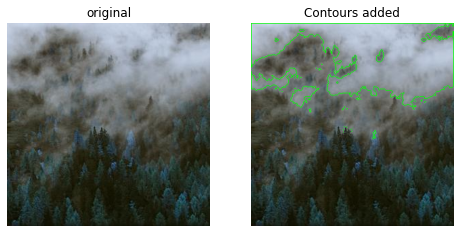

In [17]:
im = cv2.imread('img1.png')
imo = im.copy()
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
black = np.array([255 for x in range(300*300*3)]).reshape((300, 300, 3))
cv2.drawContours(im, contours, -1, (0, 255, 0), 1) 


plot_comparison(imo, im, 'Contours added')

## Q2

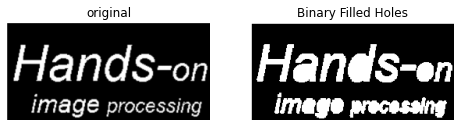

In [18]:
from scipy.ndimage.morphology import binary_fill_holes
im = cv2.imread('holes.png')
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

plot_comparison(im, binary_fill_holes(imgray), 'Binary Filled Holes')

## Q3

(-0.5, 299.5, 299.5, -0.5)

<Figure size 432x288 with 0 Axes>

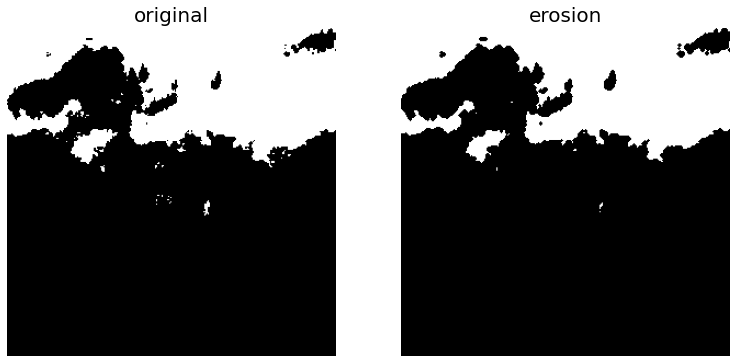

In [29]:
from skimage.morphology import binary_erosion, rectangle
from skimage.color import rgb2gray
from skimage.io import imread
im = rgb2gray(imread('img1.png'))

im[im <= 0.5] = 0
im[im > 0.5] = 1
plt.gray()
plt.figure(figsize=(20,10))
plt.subplot(131)
plt.imshow(im)
plt.title('original', size=20)
plt.axis('off')
plt.subplot(1,3,2)
im1 = binary_erosion(im)
plt.imshow(im1)
plt.title('erosion', size=20)
plt.axis('off')